In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Set the path to your dataset in Google Drive
data_dir = '/content/drive/MyDrive/Images updated'  # Adjust this path if necessary

# Load images and labels
def load_images(data_dir):
    images = []
    labels = []
    for img_name in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resize images to 128x128
        images.append(img)

        # Assign labels based on the filename
        if 'Haniya' in img_name:  # Replace 'Haniya' with a unique identifier in your filenames
            labels.append(0)  # Label for your images
        elif 'Sohaib' in img_name:  # Replace 'Sohaib' with a unique identifier in your filenames
            labels.append(1)  # Label for friend's images

    return np.array(images), np.array(labels)

images, labels = load_images(data_dir)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the dataset
augmented_images = []
augmented_labels = []

for img, label in zip(images, labels):
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0].astype(np.uint8))
        augmented_labels.append(label)
        if len(augmented_images) >= 256:  # We need 256 images
            break
    if len(augmented_images) >= 256:
        break

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Split the augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=32, random_state=42)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes: your_images and friend_images

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=16,  # Adjust as needed
    epochs=20,
    validation_data=(X_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

models_dir = '/content/drive/MyDrive/new models'
os.makedirs(models_dir, exist_ok=True)
print(f"Models directory exists: {os.path.exists(models_dir)}")

# Save the model
model_path = os.path.join(models_dir, 'trained_model.h5')
model.save(model_path)
print(f'Model saved to {model_path}')

# List files in the directory to confirm
print("Files in models directory:")
!ls /content/drive/MyDrive/models

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 502ms/step - accuracy: 0.8754 - loss: 2.9591 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 811ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 613ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 469ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 592ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 512ms/

Test accuracy: 100.00%
Models directory exists: True
Model saved to /content/drive/MyDrive/new models/trained_model.h5
Files in models directory:
trained_model.h5


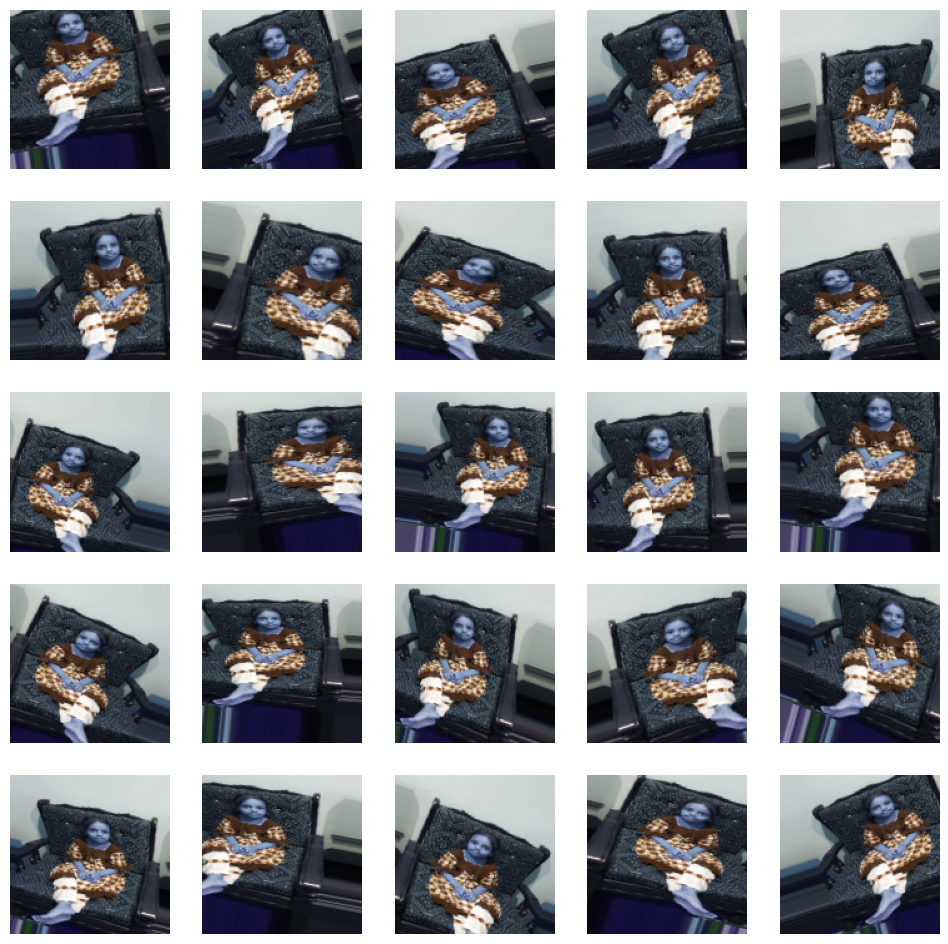

In [13]:
import matplotlib.pyplot as plt

def display_images(images, num_images=25):
    """
    Display a number of images.
    """
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Display a subset of the augmented images
display_images(augmented_images, num_images=25)  # Show 25 augmented images


In [14]:
print(f"Number of augmented training images: {len(augmented_images)}")
print(f"Number of augmented training labels: {len(augmented_labels)}")


Number of augmented training images: 256
Number of augmented training labels: 256


In [15]:
print(f"Number of testing images: {len(X_test)}")
print("Displaying testing images:")

Number of testing images: 32
Displaying testing images:
